In [2]:
from main import  *

In [3]:
#Eingabe von Metadaten pro Messung ->  {'Dateiname': {'Eigenschaft 1': Wert}}
EXTRA_META = {'2023-11-17_RNA_melting_MgCl2_NaCl.csv': {}}#'Buffer': 'MOPS', 'pH': 6.5, 'bg (mM)': 2.29, '[Buffer] in mM': 10}}
#Einlesen der Daten aus "data_raw" Ordner
data_obj = MeltingCurveAnalysis(EXTRA_META)
#Auspalten in einzelne Messkurven
data_obj.fill_data_dict()
#Meta-Informationen aus Namen gewinnen: z.B. 10 mM K(I) -> Concentration = 10
data_obj.meta_from_name_Paul(['2023-11-17_RNA_melting_MgCl2_NaCl.csv'])
#Übersicht erstellen
data_obj._create_meta_overview()

    Temperature (°C)  Absorbance  ...                          Date Cell_Number
0          90.000000    0.308678  ...  2023-11-17 09:46:11 (+01:00)      Cell 4
1          89.000000    0.310024  ...  2023-11-17 09:46:11 (+01:00)      Cell 4
2          88.000000    0.310321  ...  2023-11-17 09:46:11 (+01:00)      Cell 4
3          87.000000    0.310146  ...  2023-11-17 09:46:11 (+01:00)      Cell 4
4          86.000000    0.310018  ...  2023-11-17 09:46:11 (+01:00)      Cell 4
..               ...         ...  ...                           ...         ...
65         25.000000    0.261067  ...  2023-11-17 09:46:11 (+01:00)      Cell 4
66         24.000000    0.260621  ...  2023-11-17 09:46:11 (+01:00)      Cell 4
67         23.000000    0.260211  ...  2023-11-17 09:46:11 (+01:00)      Cell 4
68         22.000000    0.259828  ...  2023-11-17 09:46:11 (+01:00)      Cell 4
69         21.299999    0.259581  ...  2023-11-17 09:46:11 (+01:00)      Cell 4

[70 rows x 6 columns]


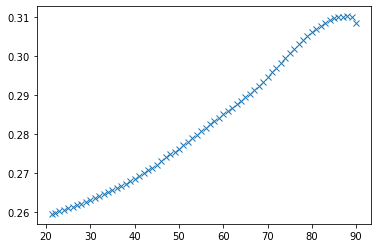

In [4]:
#Dataframe mit Rohdaten einer Kurve
#Name der Datei
dateiname = '2023-11-17_RNA_melting_MgCl2_NaCl.csv'
#Kurvennummer
i = 1
Beispieldaten = data_obj.data[dateiname][f'Measurement_{i}']['data']
print(Beispieldaten)

fig,ax=plt.subplots(1,1)
ax.plot(Beispieldaten['Temperature (°C)'], Beispieldaten['Absorbance'], 'x')

In [5]:
#Datenübersicht öffnen
data_obj.meta_overview

,Measurement,Sample Name,Wavelength (nm),Temperature Start (°C),Temperature End (°C),Run,Ramp Type,gi,file_name,Concentration,Concentration Unit
0,1,10_mM_MgCl2,260.0,90.0,21.0,1,Cooling,1,2023-11-17_RNA_melting_MgCl2_NaCl.csv,10.0,mM
1,2,10 mM MgCl2,260.0,21.0,90.0,1,Heating,2,2023-11-17_RNA_melting_MgCl2_NaCl.csv,10.0,mM
2,3,10 mM MgCl2,260.0,90.0,21.0,2,Cooling,3,2023-11-17_RNA_melting_MgCl2_NaCl.csv,10.0,mM
3,4,10 mM MgCl2,260.0,21.0,90.0,2,Heating,4,2023-11-17_RNA_melting_MgCl2_NaCl.csv,10.0,mM
4,5,5 mM MgCl2,260.0,90.0,21.0,1,Cooling,5,2023-11-17_RNA_melting_MgCl2_NaCl.csv,5.0,mM
5,6,5 mM MgCl2,260.0,21.0,90.0,1,Heating,6,2023-11-17_RNA_melting_MgCl2_NaCl.csv,5.0,mM
6,7,5 mM MgCl2,260.0,90.0,21.0,2,Cooling,7,2023-11-17_RNA_melting_MgCl2_NaCl.csv,5.0,mM
7,8,5 mM MgCl2,260.0,21.0,90.0,2,Heating,8,2023-11-17_RNA_melting_MgCl2_NaCl.csv,5.0,mM
8,9,1 mM MgCl2,260.0,90.0,21.0,1,Cooling,9,2023-11-17_RNA_melting_MgCl2_NaCl.csv,1.0,mM
9,10,1 mM MgCl2,260.0,21.0,90.0,1,Heating,10,2023-11-17_RNA_melting_MgCl2_NaCl.csv,1.0,mM


In [22]:
#Filtern nach z.B. Wellenlänge des "meta_overview"-Dataframes
#Eingabe jeweils Spaltename z.B. "Wavelength (nM)" und gesuchter Wert in Liste z.B. [260]
filtered_data = data_obj.apply_filters({'Wavelength (nm)': [260], 'Concentration': [0.1, 10]})
filtered_data

,Measurement,Sample Name,Wavelength (nm),Temperature Start (°C),Temperature End (°C),Run,Ramp Type,gi,file_name,Concentration,Concentration Unit
0,1,10_mM_MgCl2,260.0,90.0,21.0,1,Cooling,1,2023-11-17_RNA_melting_MgCl2_NaCl.csv,10.0,mM
1,2,10 mM MgCl2,260.0,21.0,90.0,1,Heating,2,2023-11-17_RNA_melting_MgCl2_NaCl.csv,10.0,mM
2,3,10 mM MgCl2,260.0,90.0,21.0,2,Cooling,3,2023-11-17_RNA_melting_MgCl2_NaCl.csv,10.0,mM
3,4,10 mM MgCl2,260.0,21.0,90.0,2,Heating,4,2023-11-17_RNA_melting_MgCl2_NaCl.csv,10.0,mM
12,13,0.1 mM MgCl2,260.0,90.0,21.0,1,Cooling,13,2023-11-17_RNA_melting_MgCl2_NaCl.csv,0.1,mM
13,14,0.1 mM MgCl2,260.0,21.0,90.0,1,Heating,14,2023-11-17_RNA_melting_MgCl2_NaCl.csv,0.1,mM
14,15,0.1 mM MgCl2,260.0,90.0,21.0,2,Cooling,15,2023-11-17_RNA_melting_MgCl2_NaCl.csv,0.1,mM
15,16,0.1 mM MgCl2,260.0,21.0,90.0,2,Heating,16,2023-11-17_RNA_melting_MgCl2_NaCl.csv,0.1,mM


parameter names: ['e1_DH', 'e1_Tm', 'e1_m1', 'e1_n1', 'e1_m2', 'e1_n2']
parameter names: ['e2_DH', 'e2_Tm', 'e2_m1', 'e2_n1', 'e2_m2', 'e2_n2']
independent variables: ['T']
independent variables: ['T']


C:\Users\schle\OneDrive\Desktop\Visual_FRET-development\fur_Vanessa\main.py:919: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, first_derivative_name] = np.gradient(df[column_y], df[column_x])
C:\Users\schle\anaconda3\envs\studium\lib\site-packages\lmfit\model.py:2074: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(x_array, reduce_complex(self.data),
C:\Users\schle\anaconda3\envs\studium\lib\site-packages\lmfit\model.py:2195: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(x_array, residuals

{'Fit': <lmfit.model.ModelResult object at 0x0000026E141A32B0>, 'result': {}}


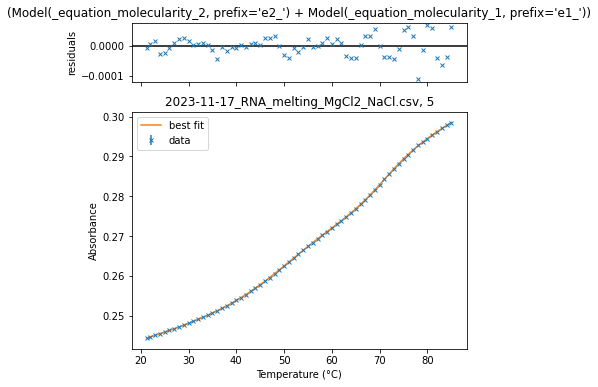

In [6]:
#Kurvenanpassung einer einzelnen Kurve
dateiname = '2023-11-17_RNA_melting_MgCl2_NaCl.csv' #Dateiname
i = 5 # Kurvennummer

#Filtern der Datenpunkte durch Angabe eines oder mehrer Rechteckfenster
filter_bounds: list = [{'column_x': 'Temperature (°C)', 'column_y': 'Absorbance', 'x_min': -np.inf, 'y_min':
                                                       - np.inf, 'x_max': 85, 'y_max': np.inf, 'keep_inside': True}]

#Parameter anpassen m1 = m2, n1 = n2
p0 = lmfit.Parameters()
p0.add('e2_Tm', value=35, vary=True)
p0.add('e1_Tm', value=70, vary=True)
    
melt_fit = data_obj._get_filtered_melt_fit(model_pars=MeltingCurveAnalysis._create_model_e2_e1(),
                                filename=dateiname, measurement_number=i, filter_bounds = filter_bounds, p0 = p0)

#Rückgabe Fit report
#print(data_obj.data[dateiname][f'Measurement_{i}']['melt_fit']['Fit'].fit_report())

print(melt_fit)

C:\Users\schle\OneDrive\Desktop\Visual_FRET-development\fur_Vanessa\main.py:1191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'Normalized {column_to_normalize}'] = MeltingCurveAnalysis.normalize(


Text(0.5, 1.0, 'Normierung des Fits')

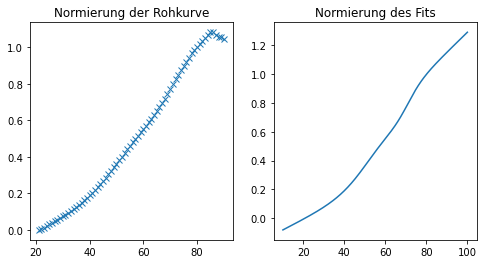

In [8]:
#Name der Datei
dateiname = '2023-11-17_RNA_melting_MgCl2_NaCl.csv'
#Kurvennummer
i = 5
Beispieldaten = data_obj.data[dateiname][f'Measurement_{i}']['data']
T_normmin = 21
T_normmax_a = 80
#Normierung einer "Rohkurve"
data_norm_raw = MeltingCurveAnalysis.normalize_data(Beispieldaten, normalize_to=(T_normmin, T_normmax_a))


#Normierung Fit -> vorheriges Feld mit entsprechender Kurve ausführen!
T_min = 10  # °C -> Minimalwert der darzzustellenden Temperatur 
T_max = 100  # °C -> Maximalwert der darzzustellenden Temperatur -> Extrapolieren
NT = 200 # -> Anzahl der T-Werte
T_fein = np.linspace(T_min, T_max, NT) #Erstellung T-array = x-Werte

#Evaluieren des mit lmfit erzeiugten Objektes
#Wenn Auswahl aus vielen Kurven: Verwendung der Funktion mit Angabe Kurve (günstig für Plotten nach Fit) _get_melt_fit_out(self, file_name, measurement_number):
melt_Fit = data_obj._get_melt_fit_out(dateiname, i)
fit = melt_fit['Fit'].eval(T=T_fein) #Erzeugung y-Werte
df_fit = pd.DataFrame({'Temperature (°C)': T_fein, 'Absorbance': fit}) #Schreiben in Dataframe, damit anwendbar für "normalize_to"-Funktion 
fit_norm = MeltingCurveAnalysis.normalize_data(df_fit, normalize_to=(T_normmin, T_normmax_a)) #Normierung auf verher festgelegte Temperaturwerte
#Für die Normierung auf beide Extrema: kein "normalize_to"-Tuple (T_normmin, T_normmax_a) angeben!

#Darstellung
fig,ax=plt.subplots(1,2)
fig.set_size_inches(8,4)
ax[0].plot(data_norm_raw['Temperature (°C)'], data_norm_raw['Normalized Absorbance'], 'x')

ax[1].plot(fit_norm['Temperature (°C)'], fit_norm['Normalized Absorbance'], '')

ax[0].set_title('Normierung der Rohkurve')
ax[1].set_title('Normierung des Fits')

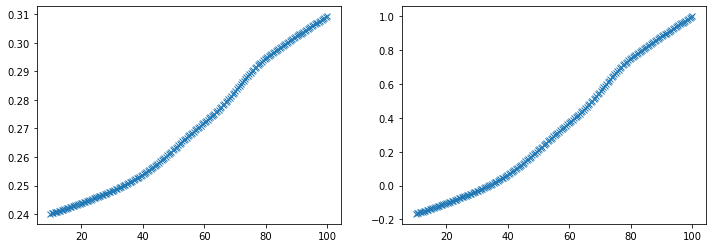

In [20]:
#Alternativfuntion: Normierung auf eine  bestimmen Absorbanzwert -> normalize-Funktion (Bitte oberes Feld zur Demonstartion ausführen)
norm = MeltingCurveAnalysis.normalize(fit, lower = 0.25) #-> 0.25 ist Abs-Wert bei ca. 40°C, 1 ist Maximum

#Darstellung
fig,ax=plt.subplots(1,2)
fig.set_size_inches(12,4)
ax[0].plot(T_fein, fit, 'x')
ax[1].plot(T_fein, norm, 'x')